In [1]:
import numpy as np
import scipy.linalg as la
import hamiltonian as hm
%matplotlib inline
import matplotlib.pyplot as plt

In [32]:
def maxes(weights):
#     print(np.shape(weights))
    ret = np.array([])
    for idx in range(3,len(weights)-3):
        val = weights[idx]
#         print(idx)
        if (val > np.max(weights[idx+1:idx+3])) and (val > np.max(weights[idx-3:idx])):
            ret = np.append(ret, idx)
#             print(idx, val)
#             print("    ", np.max(weights[idx+1:idx+3]))
#             print(weights[idx:idx+3])
#             print()
    return ret

# Looking at local maxima

In [67]:
L = 9

H = hm.sparse_H(L)
vals, vecs = la.eigh(H)
eners = np.diag(vals)
vecsd = vecs.T.conj()

# Total time elapsed
end = 6
# Time steps per second
n = 20
N = n*end
A = hm.Z
for i in range(L-1):
    A = np.kron(A,hm.I)
B = hm.Z
for i in range(L-1):
    B = np.kron(hm.I,B)

weightfore9 = np.empty((L, N))
weightback9 = np.empty((L, N))

for i in np.arange(N):
    t = i/n
    unitt = vecs@np.diag(np.exp(-1j*vals*t))@vecsd
    At = np.linalg.inv(unitt) @ A @ unitt
    Bt = np.linalg.inv(unitt) @ B @ unitt
#     print(chop(unit3t),"\n")
    front = hm.norm(At)
    back  = hm.norm(Bt)
    
    for j in range(L):
        At = hm.end_trace(At,1)
        Bt = hm.front_trace(Bt,1)
        fronthere = hm.norm(At)
        backhere  = hm.norm(Bt)
        weightfore9[L-1-j, i] = front - fronthere
        weightback9[j, i]     = back  - backhere
        front = fronthere
        back  = backhere

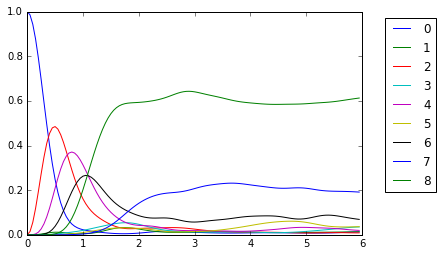

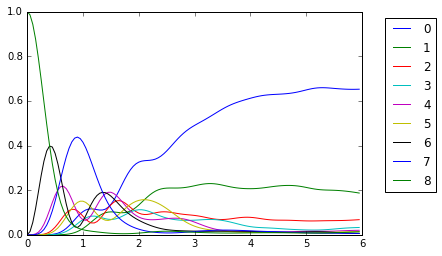

In [70]:
end = 120

for i in range(L):
    plt.plot(np.arange(end)/n,weightfore9[i,:end], label = str(i))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

for i in range(L):
    plt.plot(np.arange(end)/n,weightback9[i,:end], label = str(i))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [62]:
for i in range(L):
    idx = maxes(weightfore9[i])
    print(idx/n)
print()
for i in range(L):
    idx = maxes(weightback9[L-i-1])
    print(idx/n)

[ 2.5   4.35]
[ 0.5   1.75  3.45]
[ 0.5   2.6   5.55]
[ 1.75  3.75]
[ 0.8   4.95]
[ 1.75  4.7 ]
[ 1.05  2.45  4.3   5.4 ]
[ 3.65  4.85]
[ 2.9]

[ 2.5   4.35]
[ 0.9   3.55]
[ 0.4   1.35  3.65  5.2 ]
[ 0.95  2.1   4.5 ]
[ 0.65  1.5   2.65  4.15  5.15]
[ 1.2   2.05  3.3 ]
[ 0.8   1.65  2.45  3.95]
[ 1.5   2.55  3.3   4.7 ]
[ 1.15  5.3 ]


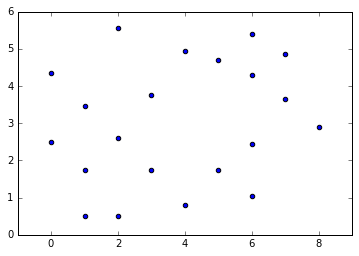

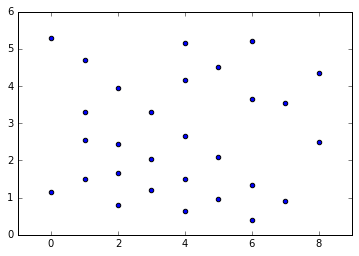

In [63]:
for i in range(L):
    for j, val in enumerate(maxes(weightfore9[i])):
        plt.scatter(i, val/n)
plt.show()

for i in range(L):
    for j, val in enumerate(maxes(weightback9[i])):
        plt.scatter(i, val/n)
plt.show()

# Looking at initial behavior

In [58]:
L = 9

H = hm.sparse_H(L)
vals, vecs = la.eigh(H)
eners = np.diag(vals)
vecsd = vecs.T.conj()

# Total time elapsed
end = 1
# Time steps per second
ninit = 60
Ninit = ninit*end
A = hm.Z
for i in range(L-1):
    A = np.kron(A,hm.I)
B = hm.Z
for i in range(L-1):
    B = np.kron(hm.I,B)

weightforeinit = np.empty((L, Ninit))
weightbackinit = np.empty((L, Ninit))

for i in np.arange(Ninit):
    t = i/ninit
    unitt = vecs@np.diag(np.exp(-1j*vals*t))@vecsd
    At = np.linalg.inv(unitt) @ A @ unitt
    Bt = np.linalg.inv(unitt) @ B @ unitt
#     print(chop(unit3t),"\n")
    front = hm.norm(At)
    back  = hm.norm(Bt)
    
    for j in range(L):
        At = hm.end_trace(At,1)
        Bt = hm.front_trace(Bt,1)
        fronthere = hm.norm(At)
        backhere  = hm.norm(Bt)
        weightforeinit[L-1-j, i] = front - fronthere
        weightbackinit[j, i]     = back  - backhere
        front = fronthere
        back  = backhere

0 [-0.29954688  0.44748075]
1 [  3.39184125 -14.87085606]
2 [ 1.76055096 -6.06599614]
3 [  5.53090314 -23.65991536]
4 [  3.79845592 -13.93090937]
5 [  7.61742289 -32.95932255]
6 [  5.82564303 -22.59080841]
7 [  9.68838538 -42.69171948]
8 [  7.86679054 -31.84727517]


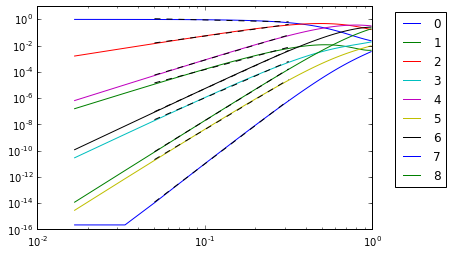

0 [ 7.85832978  0.34128068]
1 [ 10.04500131  -1.93164636]
2 [ 5.81320896  1.23083773]
3 [ 8.04068739 -0.47270318]
4 [ 3.77945622  1.57462868]
5 [ 6.06006136  0.60856418]
6 [ 1.73102837  1.06992011]
7 [ 4.12735136  1.25419612]
8 [-0.29954688 -0.77896737]


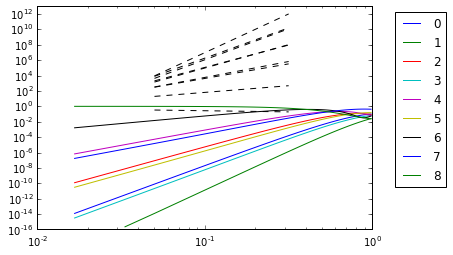

In [64]:
for i in range(L):
    plt.loglog(np.arange(Ninit)/ninit,weightforeinit[i], label = str(i))
    x = np.arange(Ninit)[3:20]
    y = weightforeinit[i][3:20]
    logx = np.log(x)
    logy = np.log(y)
    coeffs = np.polyfit(logx,logy,deg=1)
    print(i, coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(np.log(x)))
    plt.loglog(x/ninit,yfit(x), 'k--')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

for i in range(L):
    plt.loglog(np.arange(Ninit)/ninit,weightbackinit[i], label = str(i))
    x = np.arange(Ninit)[3:20]
    y = weightbackinit[i][3:20]
    logx = np.log(x/ninit)
    logy = np.log(y)
    coeffs = np.polyfit(logx,logy,deg=1)
    print(i, coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(np.log(x)))
    plt.loglog(x/ninit,yfit(x), 'k--')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()